Tutorials for course ECE1508 Reinforcement Learning at the University of Toronto.

Author: Yicheng (Eason) Qu

Email: eason.qu@mail.utoronto.ca

## The schedule of this tutorial
- A simple model-on deterministic RL problem. Recap the basic definitions in the solution
- Introduce Gymnasium with a build-in example
- Make a new problem under the framework of Gymnasium

## Related Links
Pycharm download: https://www.jetbrains.com/pycharm/?source=google&medium=cpc&campaign=AMER_en_CA_PyCharm_Branded&term=pycharm&content=698987581431&gad_source=1&gad_campaignid=14127625109&gbraid=0AAAAADloJzgaRWo97IzUV8ZfpYX0kxrqO&gclid=CjwKCAjwlaTGBhANEiwAoRgXBZLjJXUu5b7WOX-orTONbnx_8vEmbZZPeqvHTYEpki55HqO4zdzNYxoCt68QAvD_BwE

Pycharm student free application: https://www.jetbrains.com/academy/student-pack/

Gymnasium Documentation: https://gymnasium.farama.org/index.html

# ☕📚 Coffee vs. Library: A Simple Model-on RL Problem

We model the evening choices of a student as a **two-state Markov Decision Process**:

After finishing the last course of the day, you can two places to go:

- **State `s₀`: Coffee Shop**
  - **Action `a`: Buy coffee** → Reward = **2**, then go back to the Library (`s₁`).
  - **Action `b`: Linger at the shop** → Reward = **1**, stay at the Coffee Shop (`s₀`).

- **State `s₁`: Library**
  - **Action `a`: Study hard** → Reward = **1**, stay in the Library (`s₁`).
  - **Action `b`: Goof off** → Reward = **0**, drift back to the Coffee Shop (`s₀`).

---






## Definitions
- **Return** at time t
$$
G_t=\sum_{k=0}^{\infty}\gamma^k R_{t+k+1} = R_{t+1}+\sum_{k=2}^{\infty}\gamma^k R_{t+k}, \quad \gamma\in(0,1).
$$

- **State-value** under policy $\pi$:
$$
v_\pi(s)=\mathbb{E}_\pi\!\big[G_t \mid S_t=s\big]
$$

- **Action-value** under policy $\pi$:
$$
q_\pi(s,a)=\mathbb{E}_\pi\!\big[G_t \mid S_t=s,\;A_t=a\big]
$$

---

## Setup for Coffee vs Library problem, with decay factor $\gamma=0.9$

From $s_0$:
- action $a$: reward $2$, next $s_1$
- action $b$: reward $1$, next $s_0$

From $s_1$:
- action $a$: reward $1$, next $s_1$
- action $b$: reward $0$, next $s_0$


---

## Policy $\pi_a$: always choose $a$



**Solving State-value functions**
- $$ v_{\pi_a}(s_0) = 2 + \sum_{k=1}^\infty 0.9^k*1 = 2+\frac{0.9}{1-0.9} = 11$$
- $$ v_{\pi_a}(s_1) = 1 + \sum_{k=1}^\infty 0.9^k*1 = 1+\frac{0.9}{1-0.9} = 10$$

**Action-value functions**
- $q_{\pi_a}(s_0,a)=2 + \sum_{k=1}^\infty 0.9^k*1 = 11$
- $q_{\pi_a}(s_0,b)=1+0.9*2+\sum_{k=2}^\infty 0.9^k*1 = 1+ 0.9*(2+\sum_{k=1}^\infty 0.9^k*1) = 1+0.9*v_{\pi_a}(s_0) = 10.9$
- $q_{\pi_a}(s_1,a) = 1 + \sum_{k=1}^\infty 0.9^k*1=10$
- $q_{\pi_a}(s_1,b)=0+0.9*(2+\sum_{k=1}^\infty 0.9^k*1) = 9.9$

**Remarks**

#### $q_{\pi_a}(s_0,a) = v_{\pi_a}(s_0), q_{\pi_a}(s_1,a) = v_{\pi_a}(s_1)$ is NOT a coincidence. Our policy is always selecting $a$, since the state-value function matches to corresponding action-value function which selects $a$

---
## Policy $\pi_b$: always choose $b$

**Solving State-value functions**
- $$ v_{\pi_b}(s_0) = 1 + \sum_{k=1}^\infty 0.9^k \cdot 1 \;=\; 1+\frac{0.9}{1-0.9} \;=\; 10 $$
- $$ v_{\pi_b}(s_1) = 0 + 0.9 \big(1 + \sum_{k=1}^\infty 0.9^k \cdot 1\big) \;=\; 0.9 \cdot 10 \;=\; 9 $$

**Action-value functions**
- $q_{\pi_b}(s_0,a) = 2 + 0.9\cdot 0 + \sum_{k=2}^\infty 0.9^k \cdot 1 \;=\; 2 + \frac{0.9^2}{1-0.9} \;=\; 10.1$
- $q_{\pi_b}(s_0,b) = 1 + \sum_{k=1}^\infty 0.9^k \cdot 1 \;=\; 10$
- $q_{\pi_b}(s_1,a) = 1 + 0.9\cdot 0 + \sum_{k=2}^\infty 0.9^k \cdot 1 \;=\; 1 + \frac{0.9^2}{1-0.9} \;=\; 9.1$
- $q_{\pi_b}(s_1,b) = 0 + \sum_{k=1}^\infty 0.9^k \cdot 1 \;=\; \frac{0.9}{1-0.9} \;=\; 9$



## Policy $\pi_{ab}$: choose $a$ with probability $p_a$ and $b$ with $p_b=1-p_a$

**Solving State-values**
- $$ {\LARGE v_{\pi_{ab}}(s_0) = \underbrace{2*p_a+1*p_b}_{\text{reward at t+1}} + \underbrace{0.9[p_a\underbrace{(p_a*1+p_b*0)}_{\text{in } s_1 \text{ at } t+2} + p_b\underbrace{(2*p_a+1*p_b)}_{\text{in } s_0 \text{ at } t+2} ]}_{\text{reward at t+2}} + 0.9^2\cdots}$$

It seems following certain recursive structure (Bellman equation). We may leave to next tutorial.



---
# Implement RL in software (using Gymnasium)

### Install libraries

In [ ]:
import sys
!{sys.executable} -m pip install --upgrade pip setuptools wheel
!pip install gymnasium
!pip install swig
!pip install box2d
!pip install "gymnasium[box2d]"
!pip install numpy
!pip install matplotlib

  Using cached wheel-0.45.1-py3-none-any.whl.metadata (2.3 kB)
Using cached wheel-0.45.1-py3-none-any.whl (72 kB)


# Lunar Lander

---

As an engineer in NASA, your boss asks you to design an algorithm that leads a spacecraft with two landing legs to a perfect landing.
By perfect, your boss means:
- Landing within the zone
- Landing in a gentle and stable status (as slow as possible, and in a horizontal position)
- Both legs touch the ground
- Saving the energy (less firing)

The mission is aborted/completed when:
- One or more legs touch the ground
- The fuel is consumed too much (you still want your spacecraft back, hopefully)
- The spacecraft is too far away from the land (this is landing NOT launching)

The spacecraft has one main engine, and two sub-engines at two sides. Only one engine can be fired at the same time

---

![Spacecraft Animation](lunar_lander.gif)
---
### Action space:
- 0: do nothing
- 1: fire left engine
- 2: fire main engine
- 3: fire right engine

### State space:
- the position and linear velocity
- the angle and angular velocity
- whether two legs are touching the ground
---


In [3]:
import gymnasium as gym
import numpy as np
# Create the environment
env = gym.make("LunarLander-v3", render_mode="human")  # render_mode="rgb_array" for Jupyter

# Reset environment
obs, info = env.reset(seed=42)

total_reward = 0
done = False
truncated = False

while not (done or truncated):
    # Sample a random action (discrete: 0=do nothing, 1=fire left, 2=fire main, 3=fire right)
    #action = env.action_space.sample()

    #action = 1

    action = np.random.choice([0,2],p=[0.8,0.2])
    # Take a step
    obs, reward, done, truncated, info = env.step(action)
    total_reward += reward

print("Episode finished with total reward:", total_reward)
env.close()


Episode finished with total reward: -120.36616179943105


## Taxi Driver: pick-up & drop-off

---

You are a taxi driver aims to pick-up a passenger and drop him/her off at certain destination. You want to finish this task as quick as possible (so that you can pick-up more and earn more). You also know that there are areas with lots of traffic lights (takes bunch of waiting time).

### Action space
- Driving to four directions
- Pick-up/Drop-off

### State space
- Position
- Having passenger or not

### Rewards
- any action except drop-off: -1
- traffic light area: -5
- Delivery passenger to correct destination: 20
- Delivery passenger to wrong destination: -10
---

In [7]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

class TaxiEnv(gym.Env):

    # setup the environments
    def __init__(self, rows=5, cols=5, passenger_loc=(0,0), dest_loc=(4,4),traffic_blocks=None):
        super().__init__()
        #make sure all locations are properly defined
        assert check_within_board(rows,cols,passenger_loc,dest_loc,traffic_blocks)
        self.rows = rows
        self.cols = cols
        self.passenger_start = passenger_loc
        self.dest_loc = dest_loc
        self.traffic_blocks = traffic_blocks if traffic_blocks is not None else []


        # Rendering
        self.render_mode = None
        self.fig, self.ax = None, None

        # Load images
        self.img_passenger = mpimg.imread("passenger.png")
        self.img_taxi = mpimg.imread("taxi.png")
        self.img_traffic = mpimg.imread("traffic.png")
        self.img_taxi_with_passenger = mpimg.imread("taxi_with_passenger.png")
        self.img_taxi_no_passenger = mpimg.imread("taxi_no_passenger.png")
        self.img_dest_flag = mpimg.imread("dest_flag.png")
        self.img_taxi_arrive = mpimg.imread("taxi_arrive.png")

        # State and trajectory(the record of previous states)
        self.state = None
        self.trajectory = []



    #reset the initial state of the agent
    def reset(self, start_loc):
        if start_loc is None:
            taxi_r = self.np_random.integers(0, self.rows)
            taxi_c = self.np_random.integers(0, self.cols)
            self.state = {
                "taxi": np.array([taxi_r, taxi_c], dtype=np.int32),  # fixed start for now
                "passenger": 0
            }
        else:
            self.state = {
                "taxi": start_loc,  # fixed start for now
                "passenger": 0
            }
        self.trajectory = [tuple(self.state["taxi"])]  # start new trajectory
        return self.state.copy(), {}

    #playing the action
    def step(self, action):
        taxi_r, taxi_c = self.state["taxi"]
        passenger_status = self.state["passenger"]

        reward, terminated = -1, False

        if action in [0,1,2,3]:
            delta = [0,0]
            if action == 0:  # down
                delta[0] = 1
            elif action == 1:  # up
                delta[0] = -1
            elif action == 2:  # right
                delta[1] = 1
            elif action == 3:  # left
                delta[1] = -1

            new_r = np.clip(taxi_r + delta[0], 0, self.rows-1)
            new_c = np.clip(taxi_c + delta[1], 0, self.cols-1)
            self.state["taxi"] = np.array([new_r, new_c], dtype=np.int32)

            # Traffic light penalty
            if (new_r, new_c) in self.traffic_blocks:
                reward += -5

        elif action == 4:  # Pickup
            if passenger_status == 0 and tuple(self.state["taxi"]) == self.passenger_start:
                self.state["passenger"] = 1
            else:
                reward = -1

        elif action == 5:  # Dropoff
            if passenger_status == 1 and tuple(self.state["taxi"]) == self.dest_loc: # to the correct destination
                self.state["passenger"] = 2
                reward, terminated = 20, True
            else: #wrong destination
                reward,terminated = -10, True

        # Update trajectory
        if action in [0,1,2,3]:
            self.trajectory.append(tuple(self.state["taxi"]))

        return self.state.copy(), reward, terminated

    def render(self):
        if self.fig is None:
            self.fig, self.ax = plt.subplots(figsize=(self.cols, self.rows))

        self.ax.clear()
        self.ax.set_xlim(0, self.cols)
        self.ax.set_ylim(0, self.rows)
        self.ax.set_xticks(np.arange(0, self.cols+1))
        self.ax.set_yticks(np.arange(0, self.rows+1))
        self.ax.grid(True)

        # 1. Jam blocks
        for (r, c) in self.traffic_blocks:
            x, y = c, self.rows - 1 - r
            pad = 0.2
            self.ax.imshow(self.img_traffic, extent=[x+pad, x+1-pad, y+pad, y+1-pad])

        # 2. Passenger (waiting)
        if self.state["passenger"] == 0:
            r, c = self.passenger_start
            x, y = c, self.rows - 1 - r
            pad = 0.2
            self.ax.imshow(self.img_passenger, extent=[x+pad, x+1-pad, y+pad, y+1-pad])

        # 3. Destination
        r, c = self.dest_loc
        x, y = c, self.rows - 1 - r
        pad = 0.2
        self.ax.imshow(self.img_dest_flag, extent=[x+pad, x+1-pad, y+pad, y+1-pad])

        # 4. Trajectory arrows
        if len(self.trajectory) > 1:
            for i in range(len(self.trajectory)-1):
                r1, c1 = self.trajectory[i]
                r2, c2 = self.trajectory[i+1]
                x1, y1 = c1+0.5, self.rows-1-r1+0.5
                x2, y2 = c2+0.5, self.rows-1-r2+0.5
                dx, dy = x2-x1, y2-y1
                self.ax.arrow(x1, y1, dx, dy,
                              head_width=0.1, head_length=0.1,
                              fc="black", ec="red",
                              length_includes_head=True)

        # 5. Taxi
        r, c = self.state["taxi"]
        x, y = c, self.rows - 1 - r
        pad = 0.1
        if self.state["passenger"] == 0:
            self.ax.imshow(self.img_taxi_no_passenger, extent=[x+pad, x+1-pad, y+pad, y+1-pad])
        elif self.state["passenger"] == 1:
            self.ax.imshow(self.img_taxi_with_passenger, extent=[x+pad, x+1-pad, y+pad, y+1-pad])
        elif self.state["passenger"] == 2:
            self.ax.imshow(self.img_taxi_arrive, extent=[x+pad, x+1-pad, y+pad, y+1-pad])

        self.ax.set_xticklabels([])
        self.ax.set_yticklabels([])
        plt.pause(0.1)
### end of class

# make sure all locations define are in the board
def check_within_board(max_row, max_col, passenger_loc, destination_loc, traffic_blocks):
        def in_bounds(r, c):
            return 0 <= r < max_row and 0 <= c < max_col
        # Check passenger
        if not in_bounds(*passenger_loc):
            return False, f"Passenger location {passenger_loc} out of bounds."
        # Check destination
        if not in_bounds(*destination_loc):
            return False, f"Destination location {destination_loc} out of bounds."
        # Check all traffic blocks
        for block in traffic_blocks:
            if not in_bounds(*block):
                return False, f"Traffic block {block} out of bounds."
        return True

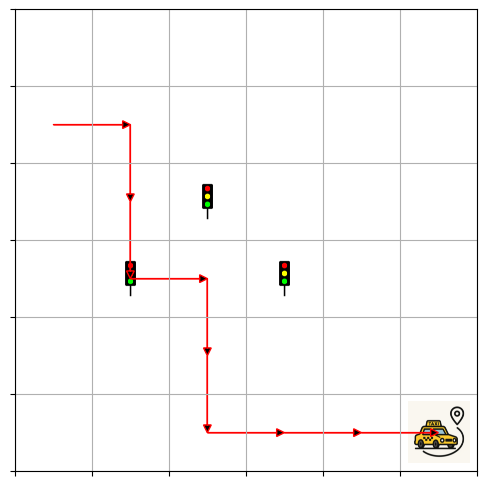

'State list is'

[{'taxi': array([1, 1], dtype=int32), 'passenger': 0},
 {'taxi': array([1, 1], dtype=int32), 'passenger': 1},
 {'taxi': array([2, 1], dtype=int32), 'passenger': 1},
 {'taxi': array([3, 1], dtype=int32), 'passenger': 1},
 {'taxi': array([3, 2], dtype=int32), 'passenger': 1},
 {'taxi': array([4, 2], dtype=int32), 'passenger': 1},
 {'taxi': array([5, 2], dtype=int32), 'passenger': 1},
 {'taxi': array([5, 3], dtype=int32), 'passenger': 1},
 {'taxi': array([5, 4], dtype=int32), 'passenger': 1},
 {'taxi': array([5, 5], dtype=int32), 'passenger': 1},
 {'taxi': array([5, 5], dtype=int32), 'passenger': 2}]

'Reward list is'

[-1, -1, -1, -6, -1, -1, -1, -1, -1, -1, 20]

In [22]:
max_row = 6
max_col = 6
passenger_loc = (1,1)
destination_loc = (5,5)
taxi_loc = (1,0)
traffic_blocks = [(2,2), (3,3),(3,1)]


env = TaxiEnv(rows=max_row, cols=max_col, passenger_loc=passenger_loc, dest_loc=destination_loc, traffic_blocks=traffic_blocks)
obs, _ = env.reset(taxi_loc)
#correct list
action_list = [2,4,0,0,2,0,0,2,2,2,5]

#action_list = [0]
state_list = []
reward_list = []
for action in action_list:
    state,reward, terminated = env.step(action)
    state_list.append(state)
    reward_list.append(reward)
env.render()
env.close()
display("State list is",state_list)
display("Reward list is",reward_list)
